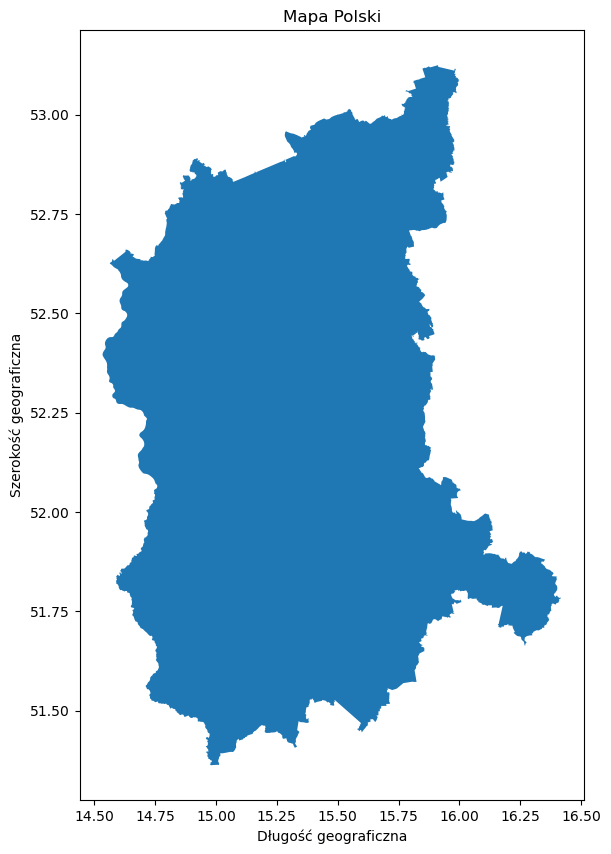

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from shapely.geometry import Point
from haversine import haversine, Unit
from matplotlib.colors import Normalize
from matplotlib import cm

# Lista do przechowywania obiektów GeoDataFrame
gdfs = []
i = 1

# Iteracja przez pliki w folderze
for filename in os.listdir():
    if filename.endswith(".shp"):
        # Wczytaj plik SHP
        filepath = os.path.join(folder_path, filename)
        gdf = gpd.read_file(filepath)
        
        # Sprawdź czy geometria to POLYGON
        if 'Polygon' in gdf.geom_type.unique():
            # Dodaj do listy tylko jeśli to POLYGON
            gdfs.append(gdf)

# Połącz wszystkie GeoDataFrame w jeden
merged_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))
from pyproj import CRS, Transformer

# Zdefiniuj obecny układ współrzędnych
obecny_uklad = CRS(merged_gdf.crs)

# Zdefiniuj układ docelowy (WGS84)
uklad_docelowy = CRS("EPSG:4326")

# Utwórz transformator między układami współrzędnych
transformer = Transformer.from_crs(obecny_uklad, uklad_docelowy)

# Przelicz współrzędne dla wszystkich geometrii w GeoDataFrame
merged_gdf['geometry'] = merged_gdf['geometry'].to_crs(uklad_docelowy)

# Zapisz przeliczone dane do nowego pliku SHP
plik_wgs84 = "Lubuskie_wgs84.shp"
merged_gdf.to_file(plik_wgs84)
# Stwórz mapę
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(ax=ax)  # Zmieniaj kolor, itp., zgodnie z Twoimi potrzebami

# Dodaj tytuł i etykiety
plt.title("Mapa Polski")
plt.xlabel("Długość geograficzna")
plt.ylabel("Szerokość geograficzna")

# Wyświetl mapę
plt.show()

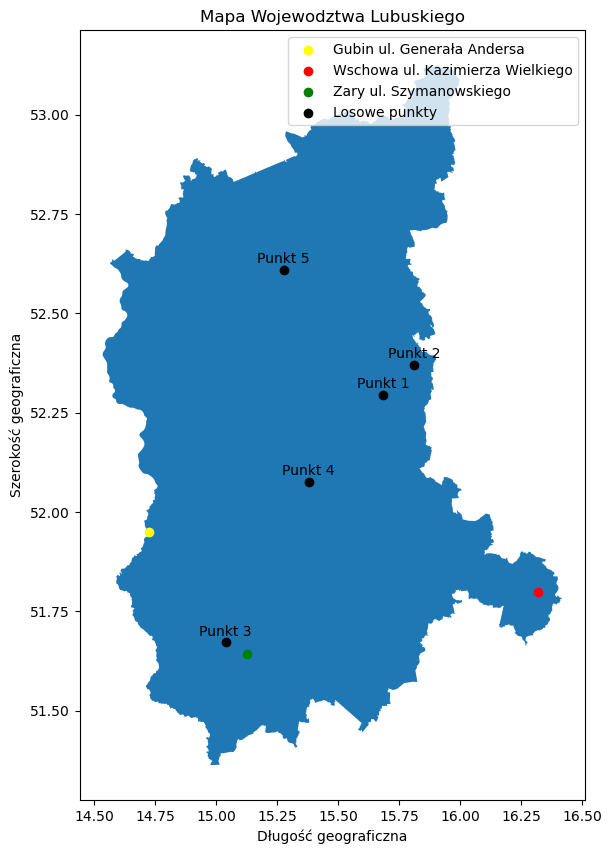

In [5]:
# Zakres współrzędnych z geometrii poligonu
min_x, min_y, max_x, max_y = merged_gdf.total_bounds

# Inicjalizacja pustej listy na punkty
points_inside_polygon = []

# Ilość punktów do wygenerowania
num_points = 5

# Wygeneruj 5 losowych punktów x, y wewnątrz poligonu
#np.random.seed(42)

while len(points_inside_polygon) < num_points:
    # Wygeneruj 1 losowy punkt x, y wewnątrz poligonu
    random_x = np.random.uniform(min_x, max_x, 1)[0]
    random_y = np.random.uniform(min_y, max_y, 1)[0]

    # Sprawdź, czy punkt znajduje się wewnątrz poligonu
    point = Point(random_x, random_y)
    if point.within(merged_gdf.unary_union):
        points_inside_polygon.append(point)

# Stwórz GeoDataFrame dla wylosowanych punktów
random_points = gpd.GeoDataFrame(geometry=points_inside_polygon, crs=merged_gdf.crs)

# Stwórz mapę
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(ax=ax)  # Zmieniaj kolor, itp., zgodnie z Twoimi potrzebami

xGA = 14.724068286506554
yGA = 51.94894077373222
Lub_Gub = gpd.GeoDataFrame(geometry=[Point(xGA, yGA)], crs=uklad_docelowy)
Lub_Gub.plot(ax=ax, color='yellow', label='Gubin ul. Generała Andersa')

xKW = 16.317500
yKW = 51.799722
Lub_Wsch = gpd.GeoDataFrame(geometry=[Point(xKW, yKW)], crs=uklad_docelowy)
Lub_Wsch.plot(ax=ax, color='red', label='Wschowa ul. Kazimierza Wielkiego')

xZS = 15.127808
yZS = 51.642656
Lub_Szyman = gpd.GeoDataFrame(geometry=[Point(xZS, yZS)], crs=uklad_docelowy)
Lub_Szyman.plot(ax=ax, color='green', label='Zary ul. Szymanowskiego')

# Dodaj punkty Żółte z etykietami
for idx, punkt in enumerate(random_points.geometry):
    ax.annotate(f'Punkt {idx + 1}', (punkt.x, punkt.y), textcoords="offset points", xytext=(0, 5), ha='center')

# Dodaj punkty Żółte
random_points.plot(ax=ax, color='black', marker='o', label='Losowe punkty')

# Dodaj legendę w prawym górnym rogu
ax.legend(loc='upper right')
# Dodaj tytuł i etykiety
plt.title("Mapa Wojewodztwa Lubuskiego")
plt.xlabel("Długość geograficzna")
plt.ylabel("Szerokość geograficzna")

# Wyświet mapę
plt.show()

In [6]:
def oblicz_odleglosc(punkt_a, punkt_b):
    wspolrzedne_a = (punkt_a.y, punkt_a.x)
    wspolrzedne_b = (punkt_b.y, punkt_b.x)

    odleglosc = haversine(wspolrzedne_a, wspolrzedne_b, unit=Unit.KILOMETERS)

    return odleglosc

# Oblicz odległości dla każdego punktu
for idx, punkt in enumerate(points_inside_polygon):
    odleglosci_Lub_Gub = oblicz_odleglosc(punkt, Point(xGA, yGA))
    odleglosci_Lub_Wsch = oblicz_odleglosc(punkt, Point(xKW, yKW))
    odleglosci_Lub_Szyman = oblicz_odleglosc(punkt, Point(xZS, yZS))
    
    print(f"Odległość dla Punktu {idx + 1} od Gubin ul. Generała Andersa: {odleglosci_Lub_Gub:.2f} km")
    print(f"Odległość dla Punktu {idx + 1} od Wschowa ul. Kazimierza Wielkiego: {odleglosci_Lub_Wsch:.2f} km")
    print(f"Odległość dla Punktu {idx + 1} od Zary ul. Szymanowskiego: {odleglosci_Lub_Szyman:.2f} km")

Odległość dla Punktu 1 od Gubin ul. Generała Andersa: 76.02 km
Odległość dla Punktu 1 od Wschowa ul. Kazimierza Wielkiego: 69.94 km
Odległość dla Punktu 1 od Zary ul. Szymanowskiego: 81.89 km
Odległość dla Punktu 2 od Gubin ul. Generała Andersa: 87.75 km
Odległość dla Punktu 2 od Wschowa ul. Kazimierza Wielkiego: 72.17 km
Odległość dla Punktu 2 od Zary ul. Szymanowskiego: 93.44 km
Odległość dla Punktu 3 od Gubin ul. Generała Andersa: 37.61 km
Odległość dla Punktu 3 od Wschowa ul. Kazimierza Wielkiego: 89.24 km
Odległość dla Punktu 3 od Zary ul. Szymanowskiego: 7.00 km
Odległość dla Punktu 4 od Gubin ul. Generała Andersa: 46.92 km
Odległość dla Punktu 4 od Wschowa ul. Kazimierza Wielkiego: 71.29 km
Odległość dla Punktu 4 od Zary ul. Szymanowskiego: 51.06 km
Odległość dla Punktu 5 od Gubin ul. Generała Andersa: 82.47 km
Odległość dla Punktu 5 od Wschowa ul. Kazimierza Wielkiego: 114.66 km
Odległość dla Punktu 5 od Zary ul. Szymanowskiego: 107.97 km


In [7]:
data = []

# Oblicz odległości dla każdego punktu
for idx, punkt in enumerate(points_inside_polygon):
    odleglosci_Lub_Gub = oblicz_odleglosc(punkt, Point(xGA, yGA))
    odleglosci_Lub_Wsch = oblicz_odleglosc(punkt, Point(xKW, yKW))
    odleglosci_Lub_Szyman = oblicz_odleglosc(punkt, Point(xZS, yZS))
    
    # Dodaj dane do listy
    data.append({
        "Nazwa Punktu": f"Punkt {idx + 1}",
        "Odległość od Gubin": odleglosci_Lub_Gub,
        "Odległość od Wschowa": odleglosci_Lub_Wsch,
        "Odległość od Zary": odleglosci_Lub_Szyman
    })

# Utwórz DataFrame
df = pd.DataFrame(data)

# Wyświetl DataFrame
print(df)


  Nazwa Punktu  Odległość od Gubin  Odległość od Wschowa  Odległość od Zary
0      Punkt 1           76.023118             69.936756          81.888016
1      Punkt 2           87.746794             72.173864          93.441350
2      Punkt 3           37.606913             89.235811           6.995576
3      Punkt 4           46.918040             71.289547          51.057190
4      Punkt 5           82.473290            114.662461         107.974892


In [9]:
# Wczytaj pierwszy plik CSV
plik1 = "o3.csv"
df_o3 = pd.read_csv(plik1)
df_o3 = df_o3[(df_o3['Rok'] == 2021) & (df_o3['Czas uśredniania'] == 1)]

# Wczytaj drugi plik CSV
plik2 = "pm25.csv"
df_pm25 = pd.read_csv(plik2)
df_pm25 = df_pm25[(df_pm25['Rok'] == 2021) & (df_pm25['Czas uśredniania'] == 1)]
wartosc_Gubin_pm25=df_pm25['Średnia'].values[0]
wartosc_Wschowa_pm25=df_pm25['Średnia'].values[1]
wartosc_Zary_pm25=df_pm25['Średnia'].values[2]
wartosc_Wschowa_o3=df_o3['Średnia'].values[0]
wartosc_Zary_o3=df_o3['Średnia'].values[1]

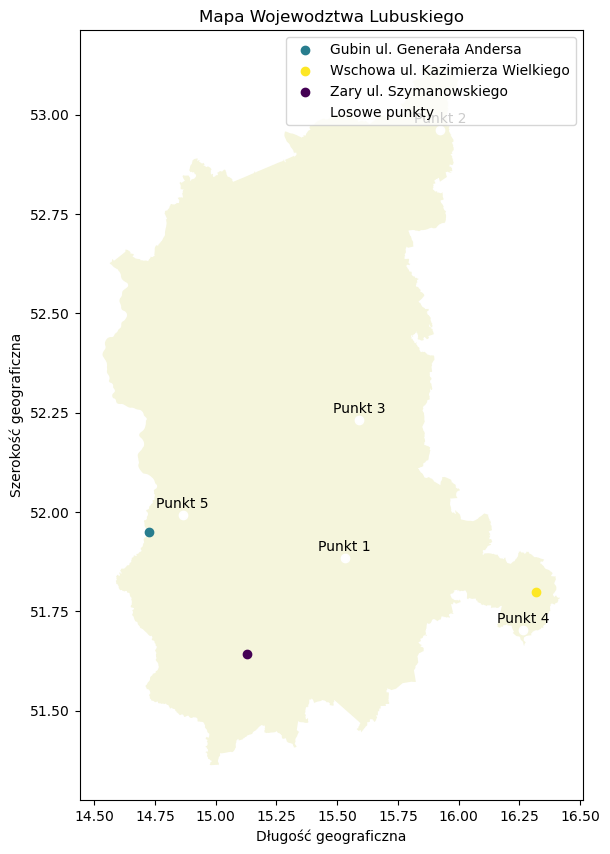

In [10]:
# Zakres współrzędnych z geometrii poligonu
min_x, min_y, max_x, max_y = merged_gdf.total_bounds

# Inicjalizacja pustej listy na punkty
points_inside_polygon = []

# Ilość punktów do wygenerowania
num_points = 5

# Wygeneruj 5 losowych punktów x, y wewnątrz poligonu
#np.random.seed(42)

while len(points_inside_polygon) < num_points:
    # Wygeneruj 1 losowy punkt x, y wewnątrz poligonu
    random_x = np.random.uniform(min_x, max_x, 1)[0]
    random_y = np.random.uniform(min_y, max_y, 1)[0]

    # Sprawdź, czy punkt znajduje się wewnątrz poligonu
    point = Point(random_x, random_y)
    if point.within(merged_gdf.unary_union):
        points_inside_polygon.append(point)

# Stwórz GeoDataFrame dla wylosowanych punktów
random_points = gpd.GeoDataFrame(geometry=points_inside_polygon, crs=merged_gdf.crs)

# Znormalizuj wartości do zakresu 0-1
norm_pm25 = Normalize(vmin=min(wartosc_Gubin_pm25, wartosc_Wschowa_pm25, wartosc_Zary_pm25),
                  vmax=max(wartosc_Gubin_pm25, wartosc_Wschowa_pm25, wartosc_Zary_pm25))

# Wybierz mapę kolorów
cmap = plt.get_cmap('viridis')

# Przekształć wartości na intensywność koloru
kolor_Gubin = cmap(norm_pm25(wartosc_Gubin_pm25))
kolor_Wschowa = cmap(norm_pm25(wartosc_Wschowa_pm25))
kolor_Zary = cmap(norm_pm25(wartosc_Zary_pm25))

#####################DLA o3 ODKOPMENTOWAĆ I ZAKOMENTOWAĆ RESZTĘ##################################################

# # Znormalizuj wartości do zakresu 0-1
# norm_o3 = Normalize(vmin=min(wartosc_Wschowa_o3, wartosc_Zary_o3),
#                  vmax=max(wartosc_Wschowa_o3, wartosc_Zary_o3))

# # Wybierz mapę kolorów
# cmap = plt.get_cmap('viridis')

# # Przekształć wartości na intensywność koloru
# kolor_Gubin = cmap(norm_o3(wartosc_Gubin_o3))
# kolor_Wschowa = cmap(norm_o3(wartosc_Wschowa_o3))
# kolor_Zary = cmap(norm_o3(wartosc_Zary_o3))

# # Stwórz mapę
# fig, ax = plt.subplots(figsize=(10, 10))
# merged_gdf.plot(ax=ax, color='beige')  # Zmieniaj kolor, itp., zgodnie z Twoimi potrzebami

# xGA = 14.724068286506554
# yGA = 51.94894077373222
# Lub_Gub = gpd.GeoDataFrame(geometry=[Point(xGA, yGA)], crs=uklad_docelowy)
# Lub_Gub.plot(ax=ax, color=kolor_Gubin, label='Gubin ul. Generała Andersa')

# xKW = 16.317500
# yKW = 51.799722
# Lub_Wsch = gpd.GeoDataFrame(geometry=[Point(xKW, yKW)], crs=uklad_docelowy)
# Lub_Wsch.plot(ax=ax, color=kolor_Wschowa, label='Wschowa ul. Kazimierza Wielkiego')

# xZS = 15.127808
# yZS = 51.642656
# Lub_Szyman = gpd.GeoDataFrame(geometry=[Point(xZS, yZS)], crs=uklad_docelowy)
# Lub_Szyman.plot(ax=ax, color=kolor_Zary, label='Zary ul. Szymanowskiego')

# # Dodaj punkty Żółte z etykietami
# for idx, punkt in enumerate(random_points.geometry):
#     ax.annotate(f'Punkt {idx + 1}', (punkt.x, punkt.y), textcoords="offset points", xytext=(0, 5), ha='center')

# # Dodaj punkty Żółte
# random_points.plot(ax=ax, color='white', marker='o', label='Losowe punkty')

# # Dodaj legendę w prawym górnym rogu
# ax.legend(loc='upper right')
# # Dodaj tytuł i etykiety
# plt.title("Mapa Wojewodztwa Lubuskiego")
# plt.xlabel("Długość geograficzna")
# plt.ylabel("Szerokość geograficzna")

# # Wyświet mapę
# plt.show()

################################################################################################################

# Stwórz mapę
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(ax=ax, color='beige')  # Zmieniaj kolor, itp., zgodnie z Twoimi potrzebami

xGA = 14.724068286506554
yGA = 51.94894077373222
Lub_Gub = gpd.GeoDataFrame(geometry=[Point(xGA, yGA)], crs=uklad_docelowy)
Lub_Gub.plot(ax=ax, color=kolor_Gubin, label='Gubin ul. Generała Andersa')

xKW = 16.317500
yKW = 51.799722
Lub_Wsch = gpd.GeoDataFrame(geometry=[Point(xKW, yKW)], crs=uklad_docelowy)
Lub_Wsch.plot(ax=ax, color=kolor_Wschowa, label='Wschowa ul. Kazimierza Wielkiego')

xZS = 15.127808
yZS = 51.642656
Lub_Szyman = gpd.GeoDataFrame(geometry=[Point(xZS, yZS)], crs=uklad_docelowy)
Lub_Szyman.plot(ax=ax, color=kolor_Zary, label='Zary ul. Szymanowskiego')

# Dodaj punkty Żółte z etykietami
for idx, punkt in enumerate(random_points.geometry):
    ax.annotate(f'Punkt {idx + 1}', (punkt.x, punkt.y), textcoords="offset points", xytext=(0, 5), ha='center')

# Dodaj punkty Żółte
random_points.plot(ax=ax, color='white', marker='o', label='Losowe punkty')

# Dodaj legendę w prawym górnym rogu
ax.legend(loc='upper right')
# Dodaj tytuł i etykiety
plt.title("Mapa Wojewodztwa Lubuskiego")
plt.xlabel("Długość geograficzna")
plt.ylabel("Szerokość geograficzna")

# Wyświet mapę
plt.show()